In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# k supercomputer data analysis
# 2019/5/28 14:52:00 CPU internal fatal error
# rack L07, BP 0, SB (system board) 06
cols_df = pd.read_csv('data/col_names.csv', header=None)
types_df = pd.read_csv('data/col_types.csv', header=None)

print(cols_df.shape)
print(types_df.shape)

keys = cols_df[0].tolist()

file_name = 'data/rack_env_all.20190528(1).csv'

k_data = pd.read_csv(file_name, names=keys, usecols=keys, header=None)
# converting timestamp column to date time
k_data.check_time = pd.to_datetime(k_data.check_time)
# k_data.set_index('check_time', inplace=True)
k_data.head()

(1172, 1)
(1172, 1)


/var/folders/h0/hxt3nq492rq5tx9r5c7xtld80000gn/T/ipykernel_41577/2166756113.py:19: DtypeWarning: Columns (1102,1104,1106,1108,1110,1112,1114,1116,1118,1120,1122,1124,1126,1128) have mixed types. Specify dtype option on import or set low_memory=False.
  k_data = pd.read_csv(file_name, names=keys, usecols=keys, header=None)


,check_time,bootgrp,rack,x,y,z,a,b,c,valve,...,a4_fan1_mode,a4_fan1_rpm,a5_fan0_mode,a5_fan0_rpm,a5_fan1_mode,a5_fan1_rpm,b0_fan0_mode,b0_fan0_rpm,b1_fan0_mode,b1_fan0_rpm
0,2019-05-28 00:00:01,0x1201,x22,12,8,0,0,0,0,open,...,Low speed(level-2),2439.0,Low speed(level-2),2374.0,Low speed(level-2),2373.0,Low speed(level-2),2369.0,Low speed(level-2),2361.0
1,2019-05-28 00:00:01,0x1103,c21,1,8,0,0,0,0,open,...,Middle speed(level-3),3026.0,Middle speed(level-3),3050.0,Middle speed(level-3),3030.0,Middle speed(level-3),3054.0,Middle speed(level-3),3047.0
2,2019-05-28 00:00:01,0x240E,l44,18,17,0,1,0,0,open,...,Middle speed(level-3),3049.0,Middle speed(level-3),3005.0,Middle speed(level-3),2967.0,Middle speed(level-3),3101.0,Middle speed(level-3),3000.0
3,2019-05-28 00:00:01,0x0A0A,p11,16,4,0,1,0,0,open,...,Low speed(level-2),2376.0,Low speed(level-2),2331.0,Low speed(level-2),2337.0,Low speed(level-2),2373.0,Low speed(level-2),2388.0
4,2019-05-28 00:00:01,0x1205,t22,14,8,0,0,0,0,open,...,Low speed(level-2),2406.0,Low speed(level-2),2401.0,Low speed(level-2),2402.0,Low speed(level-2),2360.0,Low speed(level-2),2374.0


In [2]:
k_data.loc[(k_data.check_time == '2019-05-28 13:30:01') & (k_data.rack == 'l07')].index[0]

140351

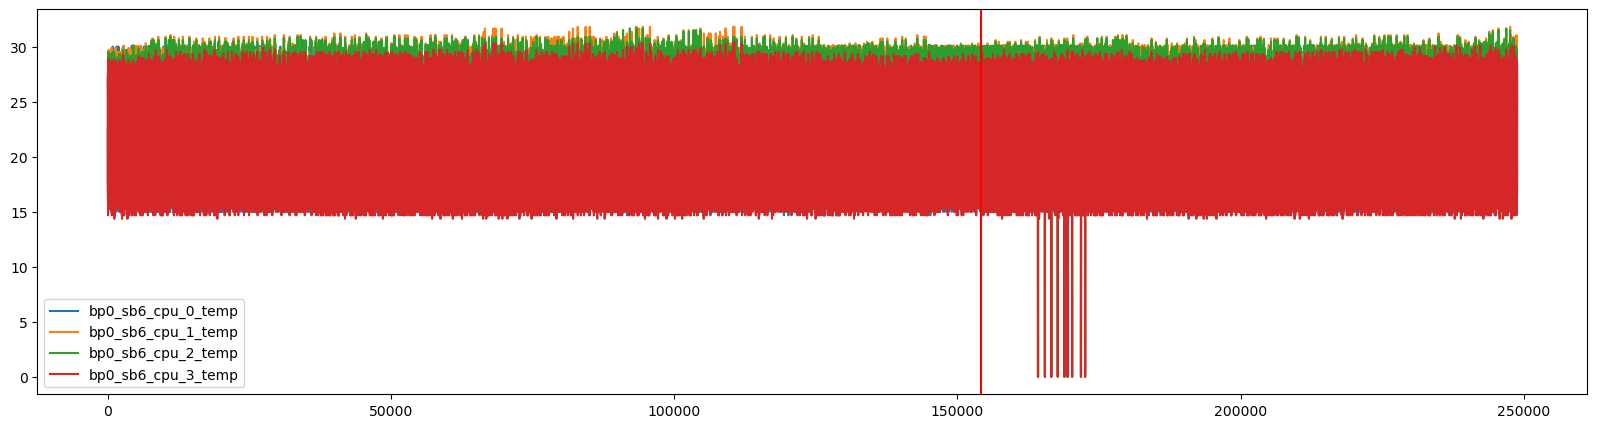

In [3]:
# getting index of error
err_time = '2019-05-28 14:50:01'
err_idx = k_data.loc[(k_data.check_time == err_time) & (k_data.rack == 'l07')].index[0]

bp0_sb6_cols = [col for col in k_data.columns if 'bp0_sb6' in col]
bp0_sb6 = k_data.loc[:,bp0_sb6_cols]
bp0_sb6[['bp0_sb6_cpu_0_temp', 'bp0_sb6_cpu_1_temp', 'bp0_sb6_cpu_2_temp', 'bp0_sb6_cpu_3_temp']].plot(figsize=(20,5))

# plotting error on bp0sb6 node in l07 rack
def plotError(): 
    plt.axvline(x=err_idx, color='r', label='CPU internal fatal error')

plotError()